### In this assignment need to predict whether a person makes over 50K per year or not from classic adult dataset using XGBoost.

In [1]:
import pandas as pd
import numpy as np

test_set = pd.read_csv('X G Boost sample.test' , header=None, skiprows=1)
train_set = pd.read_csv('X G Boost sample.data' , header=None )

col_labels = ['age', 'workclass', 'fnlwgt', 'education', 'education_num',
'marital_status', 'occupation','relationship', 'race', 'sex', 'capital_gain',
'capital_loss', 'hours_per_week', 'native_country', 'wage_class']

train_set.columns = col_labels
test_set.columns = col_labels

In [2]:
train_set.shape , test_set.shape

((32561, 15), (16281, 15))

In [3]:
# view sample data
train_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test_set.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K.


In [5]:
# cheaking null value

train_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [6]:
test_set.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [7]:
pd.DataFrame([train_set.dtypes , test_set.dtypes] , index= ["train_set" , 'test_set']).T

,train_set,test_set
age,int64,int64
workclass,object,object
fnlwgt,int64,int64
education,object,object
education_num,int64,int64
marital_status,object,object
occupation,object,object
relationship,object,object
race,object,object
sex,object,object


In [8]:
# Finding columns with data types as object

for i in train_set.columns:
    if train_set[i].dtypes == 'object':
        print(i)

workclass
education
marital_status
occupation
relationship
race
sex
native_country
wage_class


In [9]:
#train_set.workclass.value_counts()

In [10]:
#train_set.education.value_counts()

In [11]:
#train_set.race.value_counts()

In [12]:
#train_set.relationship.value_counts()

In [13]:
x_train = train_set.copy()
x_test = test_set.copy()

In [14]:
x_train.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'wage_class'],
      dtype='object')

In [15]:
# converting categorial value to numeric values

from sklearn.preprocessing import LabelEncoder

lable_encoder = LabelEncoder()

In [16]:
x_train['workclass'] = lable_encoder.fit_transform(x_train['workclass'])

x_train['education'] = lable_encoder.fit_transform(x_train['education'])

x_train['marital_status'] = lable_encoder.fit_transform(x_train['marital_status'])

x_train['occupation'] = lable_encoder.fit_transform(x_train['occupation'])

x_train['relationship'] = lable_encoder.fit_transform(x_train['relationship'])

x_train['race'] = lable_encoder.fit_transform(x_train['race'])

x_train['sex'] = lable_encoder.fit_transform(x_train['sex'])

x_train['native_country'] = lable_encoder.fit_transform(x_train['native_country'])

x_train['wage_class'] = lable_encoder.fit_transform(x_train['wage_class'])

x_train.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


In [17]:
x_train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
wage_class        0
dtype: int64

In [18]:
x_train = x_train.astype(int)

In [19]:
x_test['workclass'] = lable_encoder.fit_transform(x_test['workclass'])

x_test['education'] = lable_encoder.fit_transform(x_test['education'])

x_test['marital_status'] = lable_encoder.fit_transform(x_test['marital_status'])

x_test['occupation'] = lable_encoder.fit_transform(x_test['occupation'])

x_test['relationship'] = lable_encoder.fit_transform(x_test['relationship'])

x_test['race'] = lable_encoder.fit_transform(x_test['race'])

x_test['sex'] = lable_encoder.fit_transform(x_test['sex'])

x_test['native_country'] = lable_encoder.fit_transform(x_test['native_country'])

x_test['wage_class'] = lable_encoder.fit_transform(x_test['wage_class'])

x_test.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,wage_class
0,25,4,226802,1,7,4,7,3,2,1,0,0,40,38,0
1,38,4,89814,11,9,2,5,0,4,1,0,0,50,38,0
2,28,2,336951,7,12,2,11,0,4,1,0,0,40,38,1
3,44,4,160323,15,10,2,7,0,2,1,7688,0,40,38,1
4,18,0,103497,15,10,4,0,3,4,0,0,0,30,38,0


In [20]:
x_test = x_test.astype(int)

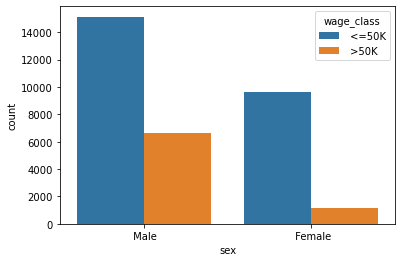

In [21]:
# Preforming visual analysis

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.countplot('sex' ,data = train_set , hue='wage_class')

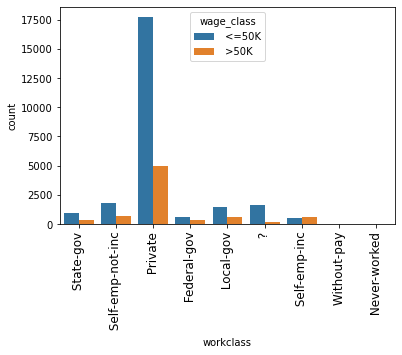

In [22]:
g = sns.countplot('workclass' , data = train_set , hue='wage_class')
g.set_xticklabels(g.get_xticklabels() , rotation = 90 , fontsize = 12)
plt.show()

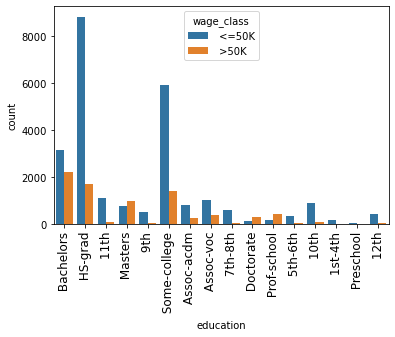

In [23]:
g = sns.countplot('education' , data = train_set , hue='wage_class')
g.set_xticklabels(g.get_xticklabels() , rotation = 90 , fontsize = 12)
plt.show()

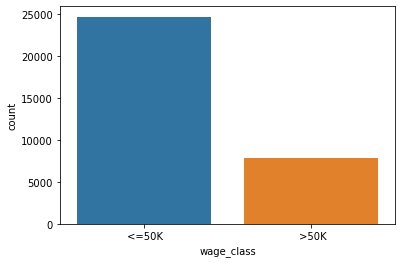

In [24]:
g = sns.countplot('wage_class' , data = train_set )

In [25]:
# train test already split no need to ues train_test_split

X_train = x_train.drop('wage_class' ,axis=1) #indi
X_test =  x_test.drop('wage_class' ,axis=1) #indi

Y_train = x_train['wage_class'] # depi
Y_test =  x_test['wage_class'] # depi

In [26]:
X = X_train.values
Y = Y_train.values

Xtest = X_test.values
Ytest = Y_test.values

In [27]:
params = {
    'max_depth'         : [3,4,5,6,7,8,9,10,11,12,13,14,15],
    'learning_rate'     : [0.05 , 0.10 , 0.15 , 0.20 , 0.25 , 0.30 , 0.35 ,0.40],
    'gamma'             : [0.0,0.1,0.2,0.3,0.4,0.5],
    'colsample_bytree'  : [0.3,0.4,0.5,0.7]
}

In [28]:
# using hypermeter tuning

from sklearn.model_selection import RandomizedSearchCV

In [29]:
# using X G Boost

# 1 method to slove

from xgboost import XGBClassifier

model = XGBClassifier()

random_search = RandomizedSearchCV(model , param_distributions=params ,n_iter=5 , scoring='roc_auc' , n_jobs= -1 , cv=5 , verbose=3 )
# vrebos for show Time

In [30]:
random_search.fit(X , Y)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:   19.5s finished
C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:26:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           reg_lambda=None,
                                           scale_pos_weight=None,
                                           subsample=No

In [31]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0.5, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=7,
              min_child_weigh=1, min_child_weight=1, missing=None,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [33]:
random_search.best_params_

{'max_depth': 10, 'learning_rate': 0.15, 'gamma': 0.4, 'colsample_bytree': 0.5}

In [34]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model , Xtest ,Ytest , cv = 10 )

C:\Users\91866\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[03:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[03:26:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { min_child_weigh } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are

In [35]:
score

array([0.8538981 , 0.86977887, 0.87899263, 0.87837838, 0.86609337,
       0.87039312, 0.87714988, 0.88022113, 0.87653563, 0.87592138])

In [36]:
print('Accuracy Score : = ' + str(score.mean()))

Accuracy Score : = 0.8727362470456393


In [37]:
# 2 method to slove

In [38]:
# got param by hypermeter tuning
param = {
    'max_depth': 7,
    'learning_rate': 0.1, 
    'gamma': 0.2,
    'colsample_bytree': 0.5
 }
param['eval_metric'] = ['logloss' , 'auc']

In [39]:
classifier = XGBClassifier(**param).fit(X ,Y)

In [40]:
preds = classifier.predict(Xtest)
preds

array([0, 0, 0, ..., 1, 0, 1])

In [41]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(Ytest , preds)

print('Accuracy Score : = ' + str(acc))

Accuracy Score : = 0.8734721454456115
